### Contents:

1. 필요한 라이브러리 가져오기
2. 데이터 읽기 및 탐색
3. 데이터 분석
4. 데이터 시각화
5. 데이터 정리
6. 최적의 모델 선택
7. 제출 파일 생성

## 1) 필요한 라이브러리 가져오기


In [126]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 2) 데이터 읽기 및 탐색

In [127]:
train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")

train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 3) 데이터 분석

In [129]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [130]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### 정리:
- 훈련 세트에는 총 891명의 승객이 있습니다.
- 나이 특성은 전체 값 중 약 19.8%가 누락되었습니다. 나이는 생존에 중요한 특성일 것으로 누락된 값을 채우는 시도
- 객실 특성은 전체 값 중 약 77.1%가 누락되었습니다. 이 특성의 많은 부분이 누락되어 있기 때문에 이러한 누락된 값을 데이터셋에서 삭제
- 탑승 항구 특성은 값의 약 0.22%가 누락되었습니다. 최빈값으로 채우는 것이 좋을거 같다

In [131]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## 4) 데이터 시각화

### Sex Feature

생존한 여성의 비율: 74.20382165605095
생존한 남성의 비율: 18.890814558058924


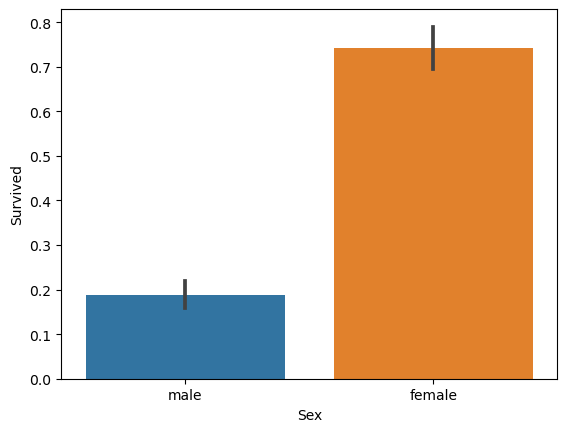

In [132]:
#성별에 따른 생존 확률
sns.barplot(x="Sex", y="Survived", data=train)

print("생존한 여성의 비율:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("생존한 남성의 비율:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

### Pclass Feature

In [1]:
sns.barplot(x="Pclass", y="Survived", data=train)

print("Pclass = 1의 생존확률:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)
print("Pclass = 2의 생존확률:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)
print("Pclass = 3의 생존확률:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

NameError: name 'sns' is not defined

높은 등급을 가질수록 생존률이 높다

### SibSp Feature

SibSp = 0 생존확률: 34.53947368421053
SibSp = 1 생존확률: 53.588516746411486
SibSp = 2 생존확률: 46.42857142857143
SibSp = 3 생존확률: 25.0
SibSp = 4 생존확률: 16.666666666666664


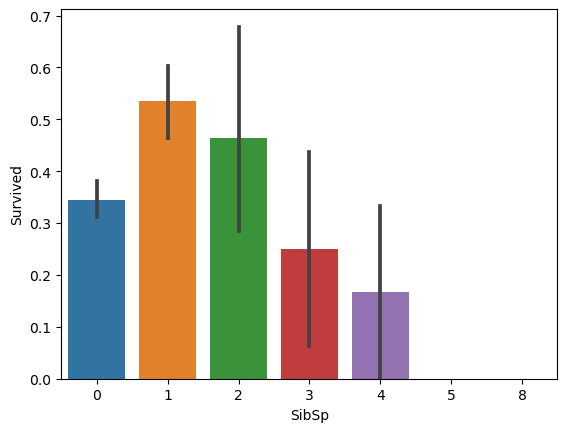

In [134]:
sns.barplot(x="SibSp", y="Survived", data=train)

print("SibSp = 0 생존확률:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)
print("SibSp = 1 생존확률:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)
print("SibSp = 2 생존확률:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)
print("SibSp = 3 생존확률:", train["Survived"][train["SibSp"] == 3].value_counts(normalize = True)[1]*100)
print("SibSp = 4 생존확률:", train["Survived"][train["SibSp"] == 4].value_counts(normalize = True)[1]*100)

형제나 배우자가 없을때보다 1,2명일때가 생존확률이 가장 높았다. 

### Parch Feature

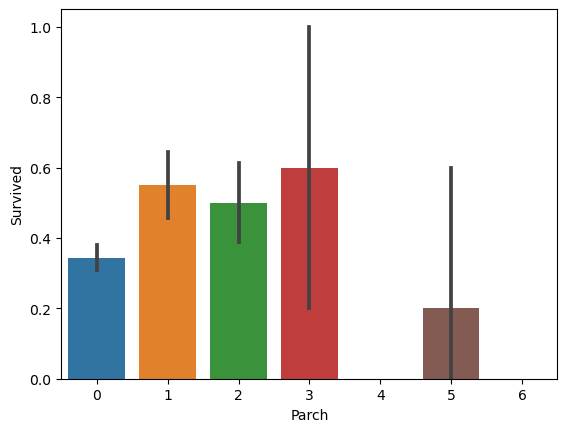

In [135]:
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

- 가족 구성원이 1-3일떄 가장 생존 확률이 높다
- 혼자 여행하는 경우 생존확률이 낮다. 구조작업때 가족구성원이 있는 경우 혜택이 있음을 암시한다. 

### 나이 특성

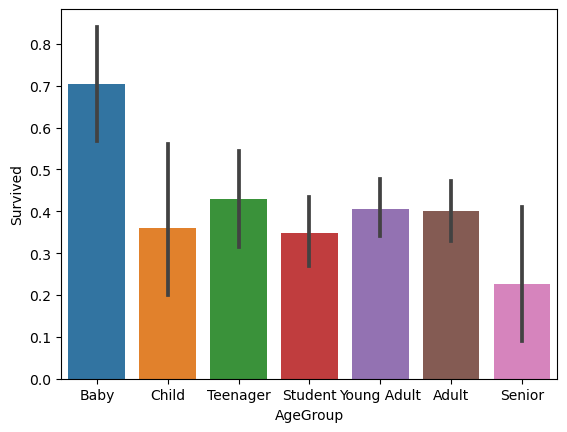

In [136]:
bins = [0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

In [137]:
train.Age.isnull().sum()

177

아기는 생존확률이 높다. 나이는 생존여부에 큰 영향을 끼침

### Cabin 특성
Cabin은 생존여부에 중요한 영향을 끼친다. 데이터셋이 없어서 버리긴 아까운 데이터다.

Cabin 값 있는 생존여부: 66.66666666666666
Cabin 값 없는 생존여부: 29.985443959243085


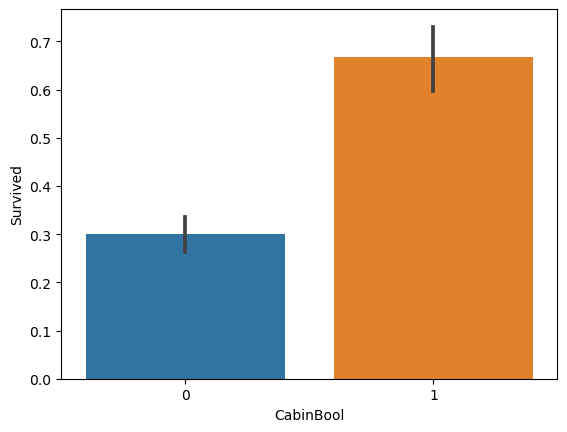

In [138]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))


print("Cabin 값 있는 생존여부:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)
print("Cabin 값 없는 생존여부:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()

Cabin 값 있는 사람들은 생존할 가능성이 더 높다... 죽은자는 말이 없어서 그런가?

## 5) 데이터 정리

In [139]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418,332,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,7,NaN
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,NaN
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


- 총 418명의 승객
- Fare 특성에서 1개의 값이 누락되어 있습니다.
- Age 특성에서는 약 20.5%의 값이 누락되어 있어 이를 어떻게 채울지 고려해야 합니다.

### Cabin 특성

In [140]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

### Ticket 특성

In [141]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

### Embarked 특성

In [142]:
print(train["Embarked"].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


S가 압도적으로 많으니 S값으로 채워주자

In [143]:
train = train.fillna({"Embarked": "S"})

### Name 특성

In [144]:
combine = [train, test]

#이름의 title을 추출한다
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [145]:
#title을 분석하기 쉽게 정리
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [146]:
#각 title을 숫자로 매핑한다.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


In [147]:
#이름 값은 지워준다. 이미 title로 중요 특성 뽑아냄
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

### Sex 특성

In [148]:
#성별도 숫자로 매칭
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,1,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,1,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,1,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,0,35.0,0,0,8.0500,S,Young Adult,0,1


### Embarked 특성

In [149]:
#Embarked 숫자로 매칭
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,22.0,1,0,7.2500,1,Student,0,1
1,2,1,1,1,38.0,1,0,71.2833,2,Adult,1,3
2,3,1,3,1,26.0,0,0,7.9250,1,Young Adult,0,2
3,4,1,1,1,35.0,1,0,53.1000,1,Young Adult,1,3
4,5,0,3,0,35.0,0,0,8.0500,1,Young Adult,0,1


### Fare 특성

In [150]:
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [151]:
train['FareBand'] = train['FareBand'].astype(int)
test['FareBand'] = test['FareBand'].astype(int)

### Age 채우기

- 나이값을 예측하는 머신러닝 모델활용하거나 통계적 예측을 고려할 수 있다. 여기선 머신러닝으로 값을 채워보자


In [152]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

### AgeGroup 머신러닝 과정

In [153]:
# "Age" 열에 결측치가 있는 행들을 따로 저장하는 DataFrame 생성
total = pd.concat([train, test], ignore_index=True)
null_AgeGroup = total[total["AgeGroup"].isnull()]

# "Age" 열에 결측치가 없는 행들을 따로 저장하는 DataFrame 생성
notnull_AgeGroup = total[total["AgeGroup"].notnull()]
Age_combine = pd.concat([null_AgeGroup, notnull_AgeGroup], axis=0)

# 두 DataFrame 출력 또는 활용
print("Rows with null Age:")
print(null_AgeGroup)

print("\nRows without null Age:")
print(notnull_AgeGroup)

Rows with null Age:
      PassengerId  Survived  Pclass  Sex  SibSp  Parch  Embarked AgeGroup  \
5               6       0.0       3    0      0      0         3      NaN   
17             18       1.0       2    0      0      0         1      NaN   
19             20       1.0       3    1      0      0         2      NaN   
26             27       0.0       3    0      0      0         2      NaN   
28             29       1.0       3    1      0      0         3      NaN   
...           ...       ...     ...  ...    ...    ...       ...      ...   
1299         1300       NaN       3    1      0      0         3      NaN   
1301         1302       NaN       3    1      0      0         3      NaN   
1304         1305       NaN       3    0      0      0         1      NaN   
1307         1308       NaN       3    0      0      0         1      NaN   
1308         1309       NaN       3    0      1      1         2      NaN   

      CabinBool  Title  FareBand  
5             0     

In [154]:
notnull_AgeGroup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1306
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1046 non-null   int64   
 1   Survived     714 non-null    float64 
 2   Pclass       1046 non-null   int64   
 3   Sex          1046 non-null   int64   
 4   SibSp        1046 non-null   int64   
 5   Parch        1046 non-null   int64   
 6   Embarked     1046 non-null   int64   
 7   AgeGroup     1046 non-null   category
 8   CabinBool    1046 non-null   int32   
 9   Title        1046 non-null   int64   
 10  FareBand     1046 non-null   int32   
dtypes: category(1), float64(1), int32(2), int64(7)
memory usage: 83.1 KB


In [156]:
import pandas as pd
from sklearn.model_selection import train_test_split
predictors = notnull_AgeGroup[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'CabinBool', 'Title', 'FareBand']]
target = notnull_AgeGroup["AgeGroup"]
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.22, random_state = 42)


In [157]:
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import optuna
from sklearn.metrics import r2_score


def objective(trial):
    # 하이퍼파라미터 탐색 공간 정의
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 5, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt'])
    
    # Random Forest 모델 생성
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    
    # 모델 학습
    model.fit(x_train, y_train)
    
    # 검증 데이터에 대한 예측
    y_valid_pred = model.predict(x_test)
    
    # 검증 데이터에 대한 정확도 계산
    r2 = r2_score(y_test, y_valid_pred)
    
    return r2

# 나머지 코드

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# 최소한 하나의 시도가 완료된 후에 출력
best_params = study.best_params
best_score = study.best_value
print('Best Parameters:', best_params)
print('Best R2 score:', best_score)

[I 2023-11-20 17:17:46,719] A new study created in memory with name: no-name-ab497e69-f76b-40cb-955c-471203feef0f
[I 2023-11-20 17:17:47,669] Trial 0 finished with value: 0.46473436644251676 and parameters: {'n_estimators': 500, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.46473436644251676.
[I 2023-11-20 17:17:48,965] Trial 1 finished with value: 0.5099891943973345 and parameters: {'n_estimators': 700, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.5099891943973345.
[I 2023-11-20 17:17:49,561] Trial 2 finished with value: 0.5231402047587759 and parameters: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 7, 'max_features': 'auto'}. Best is trial 2 with value: 0.5231402047587759.
[I 2023-11-20 17:17:49,978] Trial 3 finished with value: 0.5298183027957759 and parameters: {'n_estimators': 200, 'max_depth': 13, '

Best Parameters: {'n_estimators': 900, 'max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto'}
Best R2 score: 0.5575279004081837


In [158]:
from sklearn.ensemble import RandomForestRegressor  # Change import statement
from sklearn.metrics import r2_score

best_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

best_model.fit(x_train, y_train)

pred = best_model.predict(x_test).astype(int)

r2 = r2_score(y_test, pred)
print('R2 Score:', r2)
print(pred)


R2 Score: 0.3636173767752715
[3 1 5 4 5 5 4 4 4 4 4 4 4 5 5 5 4 4 5 5 4 5 4 5 4 1 4 4 3 4 5 5 1 5 5 4 5
 5 4 4 5 4 5 4 4 4 5 1 5 5 4 1 4 3 5 5 5 5 4 5 4 4 4 4 5 5 5 4 4 4 3 4 3 4
 5 1 5 4 3 4 5 4 4 5 5 4 1 4 4 5 2 4 5 2 5 4 3 4 5 3 4 4 1 3 5 5 5 4 4 4 5
 4 4 4 5 1 4 4 1 5 5 3 4 4 4 5 4 4 5 4 5 4 4 4 5 4 5 4 5 5 5 3 4 3 4 5 5 1
 5 5 4 4 2 2 5 4 3 4 4 4 4 4 4 4 5 1 5 5 4 4 5 4 3 5 1 5 4 3 4 1 5 2 5 4 4
 4 4 5 5 4 5 4 1 1 4 5 5 4 2 5 4 1 4 4 4 5 4 5 5 5 5 5 4 5 4 5 5 1 4 5 5 5
 5 4 5 4 4 4 4 4 4]


In [159]:
Age_test_data = null_AgeGroup[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'CabinBool', 'Title', 'FareBand']]
Age__est_predictions = best_model.predict(Age_test_data)
null_AgeGroup["AgeGroup"] = Age__est_predictions.astype(int)
null_AgeGroup

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
5,6,0.0,3,0,0,0,3,5,0,1,2
17,18,1.0,2,0,0,0,1,4,0,1,2
19,20,1.0,3,1,0,0,2,4,0,3,1
26,27,0.0,3,0,0,0,2,4,0,1,1
28,29,1.0,3,1,0,0,3,3,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,1,0,0,3,3,0,2,1
1301,1302,NaN,3,1,0,0,3,3,0,2,1
1304,1305,NaN,3,0,0,0,1,4,0,1,2
1307,1308,NaN,3,0,0,0,1,4,0,1,2


In [160]:
total= pd.concat([null_AgeGroup, notnull_AgeGroup], ignore_index=True)
result_solted = total.sort_values(by='PassengerId')

In [161]:
result_solted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 263 to 262
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   int64  
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Embarked     1309 non-null   int64  
 7   AgeGroup     1309 non-null   int64  
 8   CabinBool    1309 non-null   int32  
 9   Title        1309 non-null   int64  
 10  FareBand     1309 non-null   int32  
dtypes: float64(1), int32(2), int64(8)
memory usage: 112.5 KB


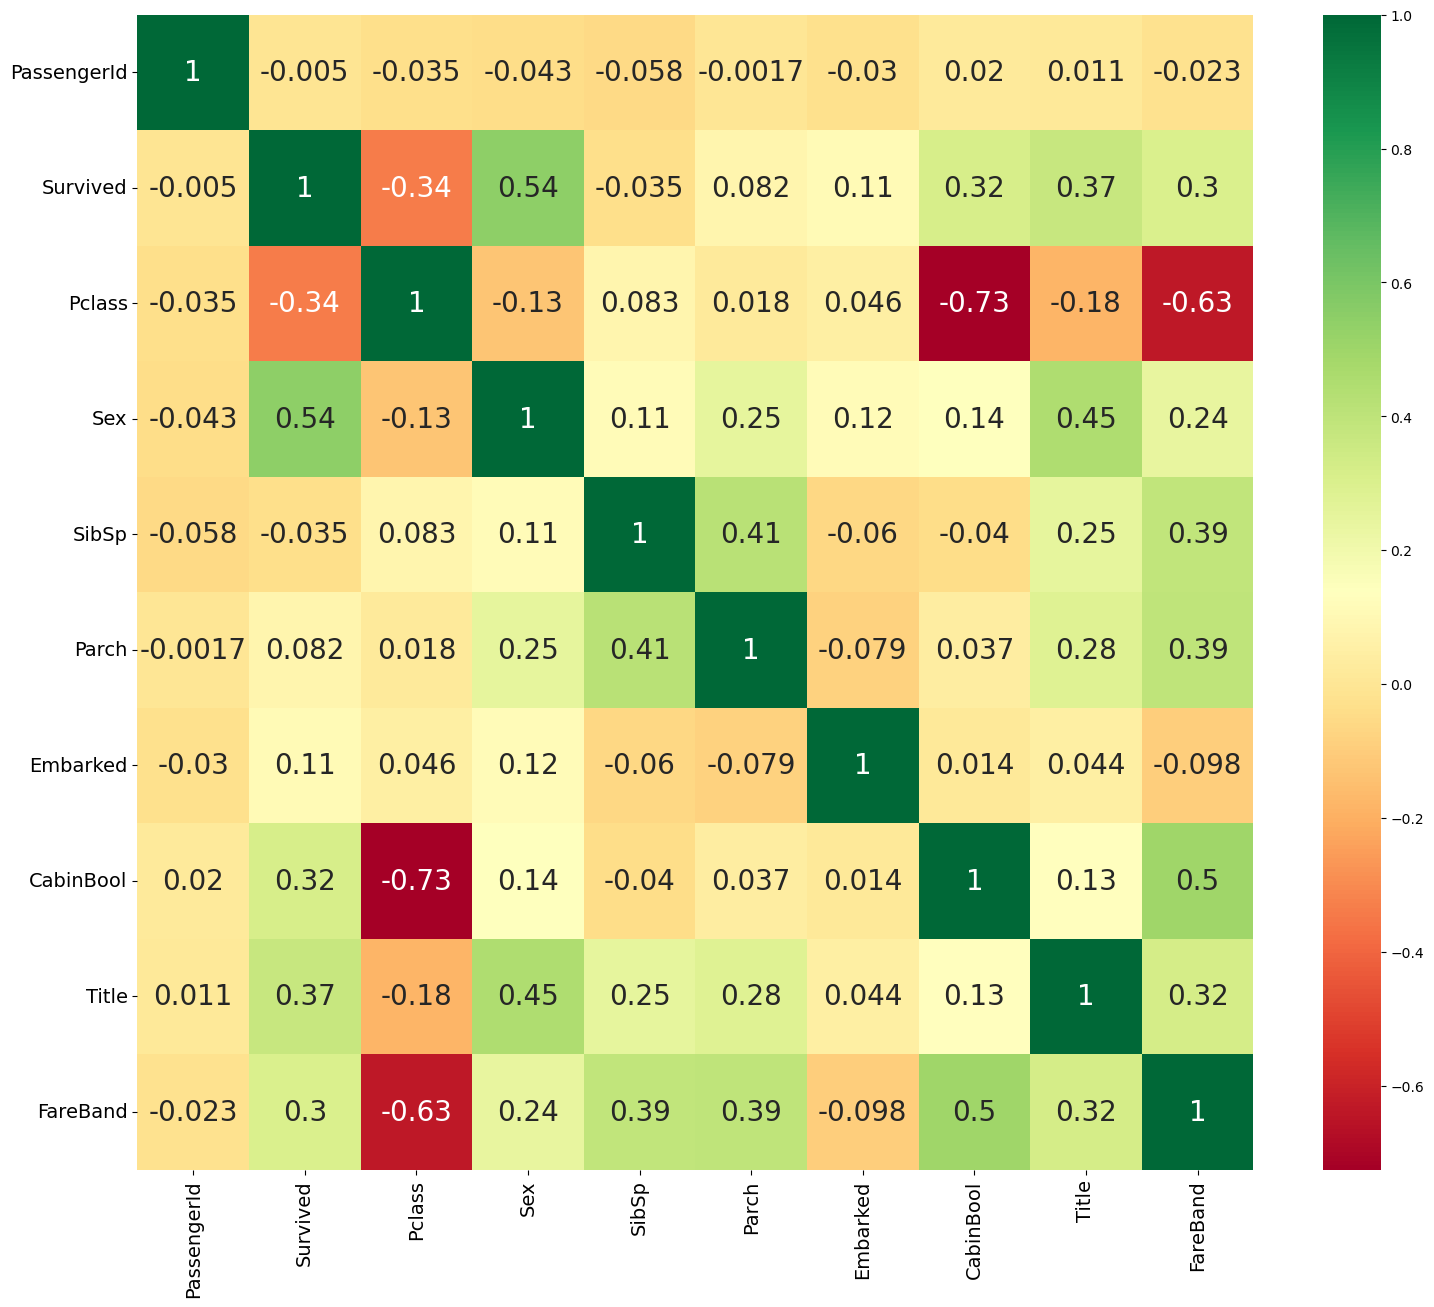

In [162]:
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',annot_kws={'size':20})#,linewidths=0.5,)
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [163]:
result_solted = pd.get_dummies(result_solted, columns=['Embarked', 'FareBand', 'Title', 'Pclass','AgeGroup','SibSp','Parch'],
                                prefix=['Embarked', 'FareBand', 'Title', 'Pclass','AgeGroup','SibSp','Parch'])

In [164]:
train_df = result_solted[result_solted['PassengerId'] <= 891]
test_df = result_solted[result_solted['PassengerId'] > 891]

## 6) Choosing the Best Model

### 테스트, 검증데이터 나누기


In [165]:
predictors = train_df.drop(['Survived','PassengerId'], axis=1)
target = train_df["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 42)

### 모델 테스팅

* Gaussian Naive Bayes
* Logistic Regression
* Support Vector Machines
* Perceptron
* Decision Tree Classifier
* Random Forest Classifier
* KNN or k-Nearest Neighbors
* Stochastic Gradient Descent
* Gradient Boosting Classifier

In [166]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

82.23


In [167]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

82.74


In [168]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

82.74


In [169]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

64.97


In [170]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

82.23


In [171]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

80.71


In [172]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

82.74


In [173]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

77.66


In [174]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

81.22


In [175]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest','Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,82.74
1,KNN,82.74
5,Linear SVC,82.74
2,Logistic Regression,82.23
6,Decision Tree,82.23
8,Gradient Boosting Classifier,81.22
3,Random Forest,80.71
7,Stochastic Gradient Descent,77.66
4,Perceptron,64.97


In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import optuna

def objective(trial):
    classifier_name = trial.suggest_categorical('classifier', ['LinearSVC', 'LogisticRegression', 'KNN'])
    
    if classifier_name == 'LinearSVC':
        svc_c = trial.suggest_loguniform('svc_c', 1e-10, 1e10)
        max_iter = trial.suggest_int('max_iter', 100, 1000)
        classifier_obj = LinearSVC(C=svc_c)
    
    elif classifier_name == 'LogisticRegression':
        C = trial.suggest_loguniform('C', 1e-10, 1e10)
        max_iter = trial.suggest_int('max_iter', 50, 500)
        penalty = trial.suggest_categorical('penalty', ['l2', 'none'])
        solver = 'lbfgs'
        classifier_obj = LogisticRegression(
            C=C,
            max_iter=max_iter,
            penalty=penalty,
            solver=solver,
            random_state=42
        )
    
    else:  # KNN
        n_neighbors = trial.suggest_int('n_neighbors', 1, 30)
        classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    accuracy = cross_val_score(classifier_obj, x_train, y_train, cv=4).mean()
    return accuracy

# Optimize hyperparameters
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)

# Print the best trial and score
print(f'Best trial: {study.best_trial.params}')
print(f'Best score: {study.best_trial.value}')


[I 2023-11-20 17:20:34,499] A new study created in memory with name: no-name-50174045-6b25-406e-992d-4716f33f8526
[I 2023-11-20 17:20:34,556] Trial 0 finished with value: 0.6224835559099063 and parameters: {'classifier': 'LogisticRegression', 'C': 3.6602476192537356e-09, 'max_iter': 376, 'penalty': 'l2'}. Best is trial 0 with value: 0.6224835559099063.
[I 2023-11-20 17:20:34,588] Trial 1 finished with value: 0.808310079064514 and parameters: {'classifier': 'LinearSVC', 'svc_c': 0.00818706299354319, 'max_iter': 129}. Best is trial 1 with value: 0.808310079064514.
[I 2023-11-20 17:20:34,685] Trial 2 finished with value: 0.7130838482492857 and parameters: {'classifier': 'LinearSVC', 'svc_c': 87.8012716071832, 'max_iter': 913}. Best is trial 1 with value: 0.808310079064514.
[I 2023-11-20 17:20:34,814] Trial 3 finished with value: 0.8141153411733439 and parameters: {'classifier': 'LogisticRegression', 'C': 2.4064724219597347e-08, 'max_iter': 168, 'penalty': 'none'}. Best is trial 3 with val

Best trial: {'classifier': 'LogisticRegression', 'C': 0.8280629642742704, 'max_iter': 212, 'penalty': 'l2'}
Best score: 0.822760946116537


In [177]:
# 시행된 trial 중 최적의 하이퍼파라미터 반환하는 메소드
print(study.best_trial.params)

# 시행된 trial 중 가장 높은 값 반환하는 메소드

optuna_acc = study.best_trial.value
print(optuna_acc)

{'classifier': 'LogisticRegression', 'C': 0.8280629642742704, 'max_iter': 212, 'penalty': 'l2'}
0.822760946116537


In [178]:
x_train.shape, x_val.shape

((694, 40), (197, 40))

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

best_params = study.best_trial.params

C_value = best_params['C']
max_iter_value = int(best_params['max_iter'])
penalty_value = best_params['penalty'] 

best_model = LogisticRegression(
    C=C_value,
    max_iter=max_iter_value,
    penalty=penalty_value,
    random_state=42
)

best_model.fit(x_train, y_train)

pred = best_model.predict(x_val).astype(int)

accuracy = accuracy_score(y_val, pred)
print('Accuracy:', accuracy)


Accuracy: 0.8223350253807107


## 7) 파일 생성

In [181]:
predictions = best_model.predict(test_df.drop(['PassengerId','Survived'], axis=1)).astype(int)
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [182]:
output = pd.DataFrame({ 'PassengerId' : test_df['PassengerId'], 'Survived': predictions })
output.to_csv('submission.csv', index=False)